<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Rossi!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__


It seems that the project was worked on locally and the file paths were not changed to publicly available ones. It is worth rewriting the code so that it would run both in the jupiter hub and locally without making any additional edits. This can be achieved in many ways. For example, use the try-except construct for file paths: try - paths on the local computer, except - paths on the server.    
    
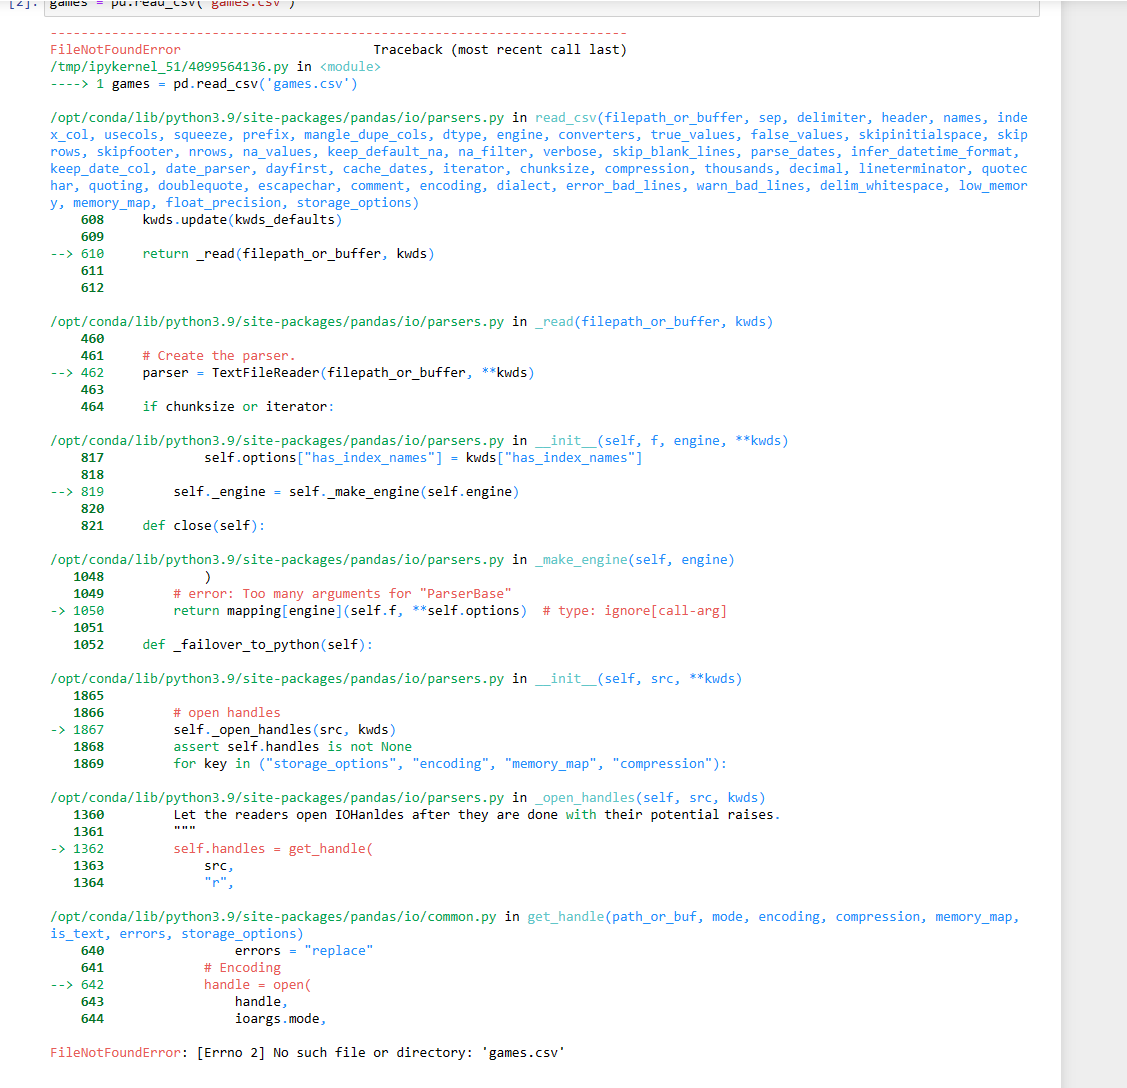

# Video game aspects that will influence their success

Ice, an internet business, offers video games all around the globe. These folks desire to know what aspects contribute to a video game's worldwide success or failure. Ice supplied video game statistics from free sources, including home and professional reviews, genres, video gaming systems, and sales history. First, the specific information will be reviewed, and any inconsistencies or undesirable data will be corrected. Firstly, any missing numbers or incorrect data types will undoubtedly be repaired. Once the data is available for examination, each video game's worldwide sales will be computed by adding the local sales together. (North America, Europe, Japan, and Other). Using the overall product sales, the particular information analysis may begin. Certain data will be plotted and studied to see if there are any trends that might assist determine whether or not a video game is successful. Finally, two concepts will be investigated regarding user ranks by platform and genre. Also, to determine if the average user ratings for the Xbox One and PC platforms are the same, as well as whether the average user ratings for the Actions and styles differ significantly. 


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

## Load Data 

In [2]:
games = pd.read_csv('/datasets/games.csv')

## Exploring the data

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The provided DataFrame contains 16,715 entries across 11 columns. The columns represent various attributes such as the name of the game, platform, year of release, genre, sales figures for different regions (North America, Europe, Japan, and other regions), critic score, user score, and rating. Notably, some columns have missing values, particularly "Year_of_Release," "Name," "Genre," "Critic_Score," "User_Score," and "Rating," with differing counts of non-null values, indicating potential data inconsistencies or incomplete records.


The following columns have missing data:

    Name
    Year_of_Release
    Genre
    Critic_Score
    User_Score
    Rating
 One of the most noticeable issues is that the 'User_Score' and 'Rating' columns are missing roughly one-third of their data. This will need to be looked into further to decide if the missing data can be filled in or the columns should be removed.

When considering data types, the 'Year_of_Release' column should include integers, whereas the 'User_Score' column should have float64 values. However, the 'Year_of_Release' column has float64 data types, but the 'User_score' column contains object data types. These two data types will need to be converted into more appropriate data types.

In [4]:
#print first 20 rows for a better view of the data
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The data shown in the first 20 rows of the dataframe is consistent with expectations. However, on looking at the numbers saved in the 'Critic_Score' column, it is clear that they are just integers recorded as float64 values. As a result, the data type of the 'Critic_Score' column may be transformed to an integer. This will be completed in the next part, while the missing values are substituted.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
That's great. The first data review is done

## Fixing the Data

In [5]:
#Replace the column names (make them lowercase).

games.columns= games.columns.str.lower()

#display column names

games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
Good for you for using the str.lower() method

In [6]:
#display missing values
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


With just two names missing from the whole dataset, which is 0.01%. We may safely remove the rows with missing values since they will have no effect on the results.

The displayed results showcase two rows from the DataFrame where the "name" column contains missing values, denoted as NaN. These rows, indexed at 659 and 14244, exhibit incomplete information across various columns, including "genre", "critic_score", "user_score", and "rating". The presence of NaN values indicates data gaps that may require further investigation or handling during data analysis or processing.

In [7]:
# Remove the name rows with missing values
games.dropna(subset=['name'], inplace=True)


There are just two names missing from the whole dataset, which is 0.01%. We may safely remove the rows with missing data since it will have no effect on the results.

In [8]:
# Display missing values in year_of_release column
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


As with the preceding section, there are 269 missing values, accounting for 1.61 percent of the total dataset. We may safely remove the rows with missing data.

In [9]:
# Remove the year_of_release rows with missing values
games.dropna(subset=['year_of_release'], inplace=True)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

I agree

The given code eliminates rows from the DataFrame games that have missing values in the "year_of_release" column. This process guarantees that only entries with full data for each game's release year are maintained in the DataFrame. The inplace=True argument alters the original DataFrame, enabling further analyses to be performed on the cleaned dataset without generating a new DataFrame.

In [10]:
# change year of release to an interger
games['year_of_release'] = games['year_of_release'].astype('int')

The supplied code changes the data type of the "year_of_release" column in the DataFrame games to integer (int). This action guarantees that the values in the "year_of_release" column are displayed as whole numbers, not decimal points, as is suitable for years. Non-integer or missing values in the "year_of_release" field will be transformed or coerced to integers, if appropriate.

In [11]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


It seems that after removing the rows with missing values in the 'name' or 'year_of_release' columns, there are no more entries with missing values in the 'genre' column. No further action is needed.

In [12]:
# Display missing values in critic_score column
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Fill the missing values in critic_score with interpolated values
games['critic_score'] = games['critic_score'].interpolate().round(2)

The given code interpolates missing values in the "critic_score" column of the DataFrame games and then rounds the interpolated values to two decimal places. Interpolation is a method used to estimate the missing values based on the surrounding data points. In this case, missing critic scores are filled in by estimating values based on neighboring scores, and then these estimated values are rounded to two decimal places for consistency.

In [14]:
# check the missing values in critic_score column
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


the missing values in the "critic_score" column have been successfully removed. Removing the missing values is an essential step in data preprocessing to ensure the integrity and accuracy of subsequent analyses.

In [15]:
# Display missing values in user_score column
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,79.00,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,83.00,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,86.00,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,88.33,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,89.67,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,63.00,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,63.00,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,63.00,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,63.00,NaN,NaN


With 'user_score', we are missing 39% of the data. First, we have certain data called 'tbd' that we will need to handle. Then, like previously, since we can't accurately anticipate the scores, we'll leave them at nan.# Check if tbd values in user_score column

In [16]:
# Check if tbd values in user_score column
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,93.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,82.5,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,75.5,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,62.0,tbd,E


To address the 'tbd' values in the data, the 'NaN' will be replaced. Subsequently, all values will be converted back to a float data type to ensure uniformity across the collection. This approach will guarantee that the analysis runs smoothly, with no ambiguous or undefined values present.

In [17]:
# replace tbd values with NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)

This code replaces any occurrences of 'tbd' (to be determined) in the 'user_score' column of the DataFrame 'games' with 'NaN' (not a number), indicating missing or undefined values. By replacing 'tbd' with 'NaN', it standardizes the representation of missing user scores, facilitating consistent handling and analysis of the data.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, tbd is the same in meaning as skip

In [18]:
# change the user_score column to float
games['user_score'] = games['user_score'].astype(float)

This code converts the data type of the 'user_score' column in the DataFrame 'games' to float, ensuring numerical consistency for further analysis. By converting 'user_score' to a float data type, it enables mathematical operations and statistical calculations on the user score data.

In [19]:
# Fill the missing values in user_score with interpolated values 
games['user_score'] = games['user_score'].interpolate().round(2)

  This code interpolates missing values in the 'user_score' column of the DataFrame 'games' and then rounds the interpolated values to two decimal places. Interpolation estimates missing user scores based on neighboring values, and rounding ensures consistency and precision in the user score data.

In [20]:
# check the missing values in user_score column
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


This code filters the DataFrame 'games' to display only the rows where the 'user_score' column contains missing values (NaN). It provides visibility into which entries have undefined or missing user scores, facilitating further investigation or handling of these data gaps.

In [21]:
# Display missing values in rating column
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,79.00,8.15,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,83.00,8.17,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,86.00,8.33,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,88.33,8.47,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,89.67,8.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,63.00,5.80,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,63.00,5.80,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,63.00,5.80,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,63.00,5.80,NaN


This code filters the DataFrame 'games' to display only the rows where the 'rating' column contains missing values (NaN). It reveals games with undefined or missing ratings, aiding in understanding the scope of missing data in the rating column. This visibility facilitates decision-making regarding potential strategies for handling or imputing missing rating values.

Once more, approximately 39% of the data is absent, hence it will be temporarily filled with 'unknown'.

In [22]:
# fill the missing values in rating column with 'unknown'
games['rating'] = games['rating'].fillna('unknown')

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

This code fills the missing values in the 'rating' column of the DataFrame 'games' with the string 'unknown'. It ensures that entries without a specified rating are assigned a placeholder value, facilitating uniformity and completeness in the dataset.

In [23]:
# Count the values in the rating column
games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

Upon examining the rating values, it's evident that several ratings have fewer than 10 occurrences. After conducting research, it appears that some ratings originate from various rating systems worldwide. To address this, we will merge these values with their popular counterparts. Additionally, we will update the 'unknown' values to 'RP' (Rating Pending) for consistency.

This code counts the occurrences of each unique value in the 'rating' column of the DataFrame 'games'. It provides a summary of the distribution of ratings across the dataset, helping to understand the prevalence of different rating categories in the dataset.

In [24]:
# Change ratings EC to E and K-A to T and AO to M and RP to unknown
rating_replacements = {'EC': 'E', 'K-A': 'T', 'AO': 'M', 'unknown': 'RP'}
games['rating'] = games['rating'].replace(rating_replacements)
games.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,79.00,8.15,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,83.00,8.17,RP
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,86.00,8.33,RP
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,88.33,8.47,RP


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great!

With the data now corrected and prepared for analysis, let's enhance it with additional information to aid in our analysis. A crucial aspect is understanding how global sales of each video game compare. Therefore, we'll append a new column to the games DataFrame, aggregating the total sales from all regions for each video game.

In [25]:
# Create a new column total_sales 
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

#display the first 20 rows
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,79.00,8.15,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,83.00,8.17,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,86.00,8.33,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,88.33,8.47,RP,28.31


<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
You can also use sum with axis=1 argument

This code creates a new column named 'total_sales' in the DataFrame 'games' by summing the sales figures from the 'na_sales', 'eu_sales', 'jp_sales', and 'other_sales' columns. It then displays the first 20 rows of the DataFrame 'games' including the newly created 'total_sales' column, providing a glimpse of the aggregated sales data for the initial video games.

In [26]:
# check dataframe for duplicates
duplicate_rows= games[games.duplicated()] 
display(duplicate_rows)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


This code filters the DataFrame 'games' to extract rows that are duplicates of other rows based on all columns, storing them in the variable 'duplicate_rows'. Then, it displays the DataFrame containing these duplicate rows, allowing for further examination or handling of duplicate entries in the dataset.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №3__
    
Duplicate checking is the basis of data preprocessing

## Observation on missing data

Missing data, also known as missing values or missingness, occurs when there is no recorded information for a certain variable inside a dataset. This absence may occur for a variety of reasons, including the unavailability of data during data collection, the inability to acquire particular information owing to practical limits or data entry mistakes, or the purposeful exclusion of certain data points. Missing data, regardless of the reason, may provide issues in data analysis and interpretation, emphasizing the need of understanding and properly treating missing values to preserve the integrity and dependability of analytical results.

## Analyzing the data

Let's look at video games and sales distribution. First, consider how many video games were released in each individual year.

In [27]:
# pivot table showing how many video games were released for each year
games.pivot_table(index='year_of_release', values ='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


The total number of video game releases organized by year of release. Each row belongs to a certain year, and the number next to it represents the number of video game releases in that year. This research provides useful insights on the temporal distribution of video game releases across time, revealing trends and patterns in the gaming industry. 

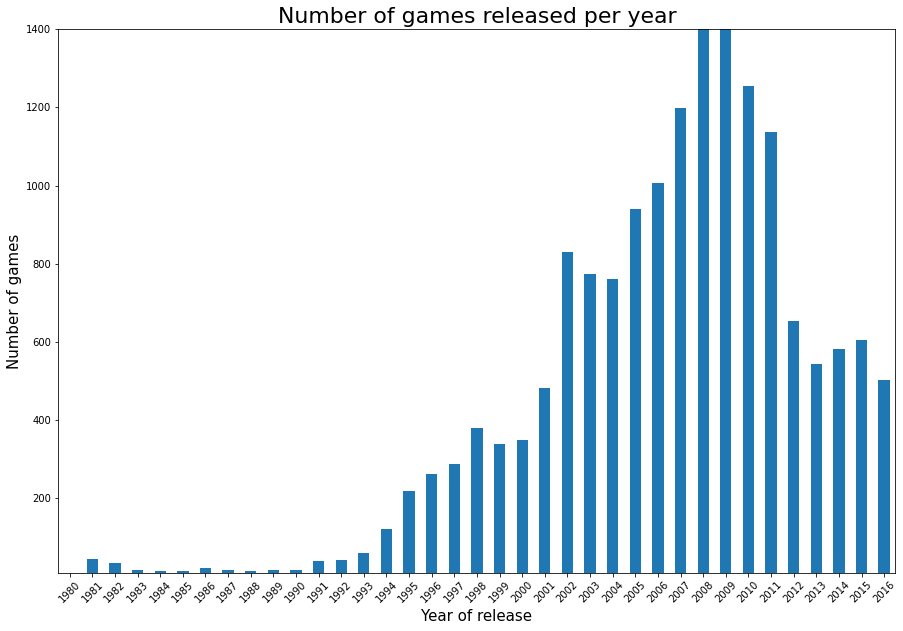

In [28]:
# Obtain the same pivot table as above and plot a bar chart
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,10))

# Add a title, xlabel, ylabel, and then plot
plt.title('Number of games released per year', fontsize=22)
plt.xlabel('Year of release', fontsize=15)
plt.ylabel('Number of games',  fontsize=15)
plt.xticks(rotation=45)
plt.legend().set_visible(False)
# Set the y-axis limit
plt.ylim([10, 1400])
plt.show()

<div class="alert alert-block alert-warning">📝

__Reviewer's comment №1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
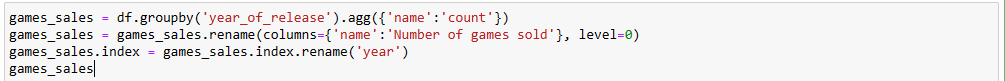
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
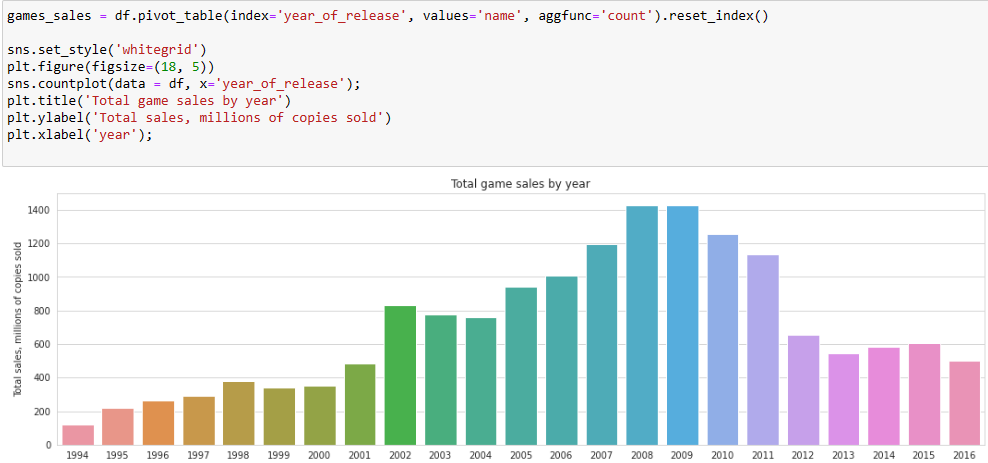
</div>

The peak period for video game releases occurred between 1995 and 2016, with the highest volume of releases spanning from 2007 to 2010. However, post-2009, there was a sharp decline in annual releases from 1,400 to around 600 games by 2014. Now, let's explore how the total sales of video games varied across different platforms.

In [29]:
# Create a pivot table for the total global sales for each platform.
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Among the platforms examined, 'PS2', 'X360', 'PS3', 'Wii', and 'DS' emerge as the top performers in terms of sales. To gain deeper insights into the sales dynamics of these platforms, it's essential to explore their sales distribution across various years. By analyzing sales trends on a yearly basis, we can identify patterns, fluctuations, and potential factors influencing the performance of these platforms over time. This examination will provide valuable context for understanding the market dynamics and strategic implications for game developers and platform manufacturers alike.

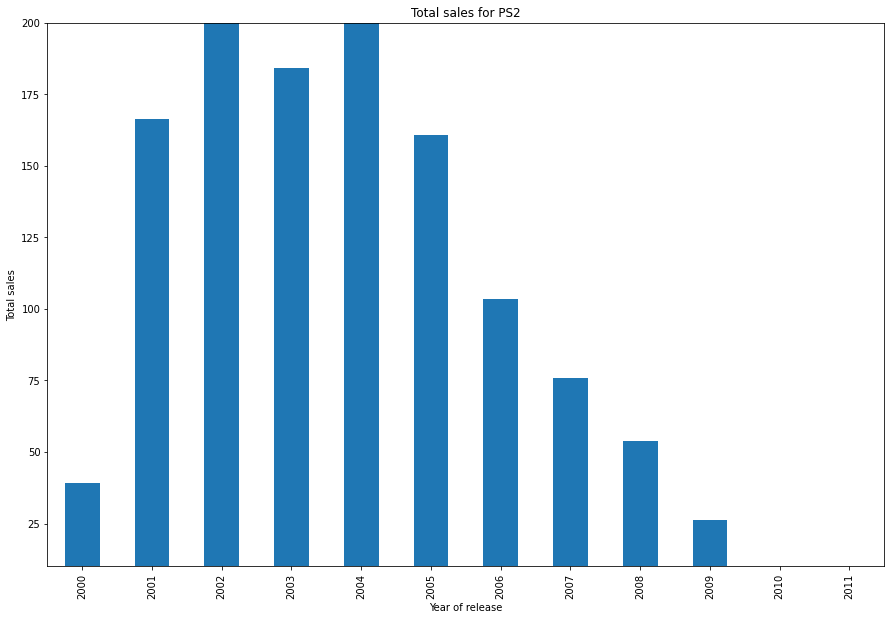

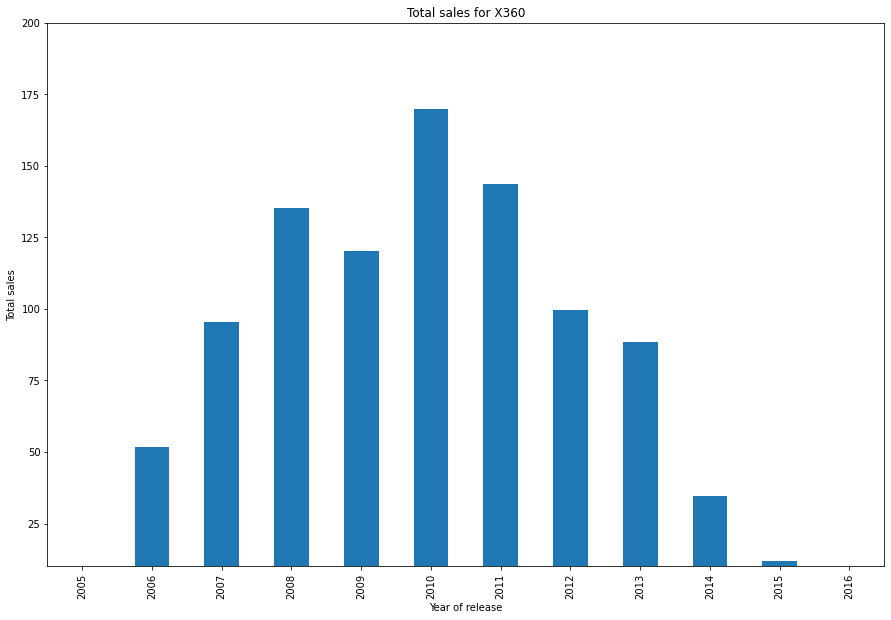

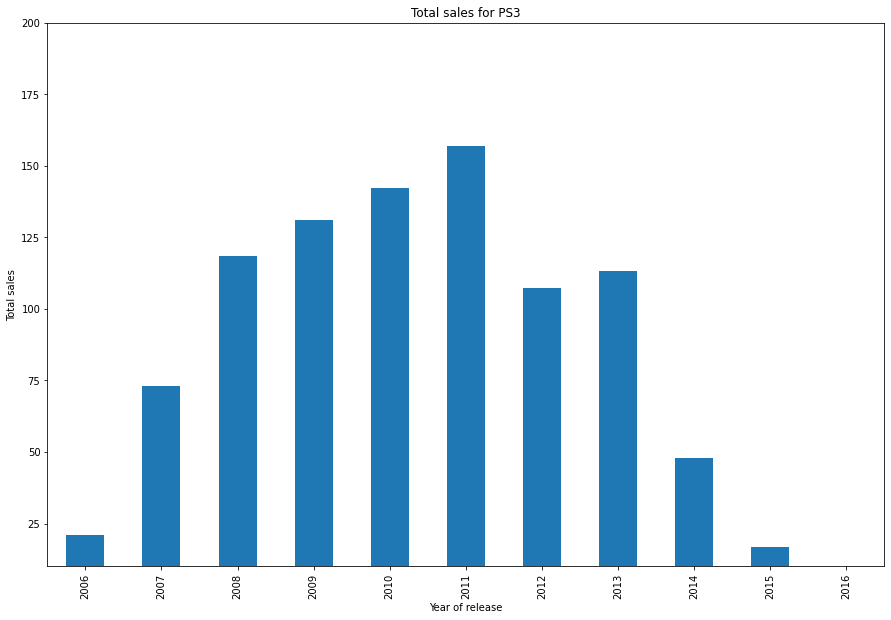

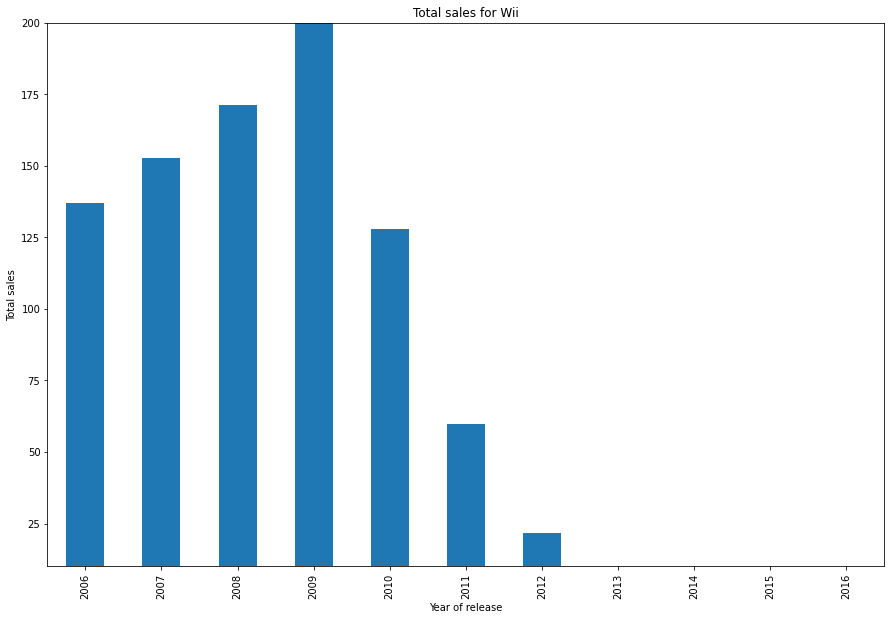

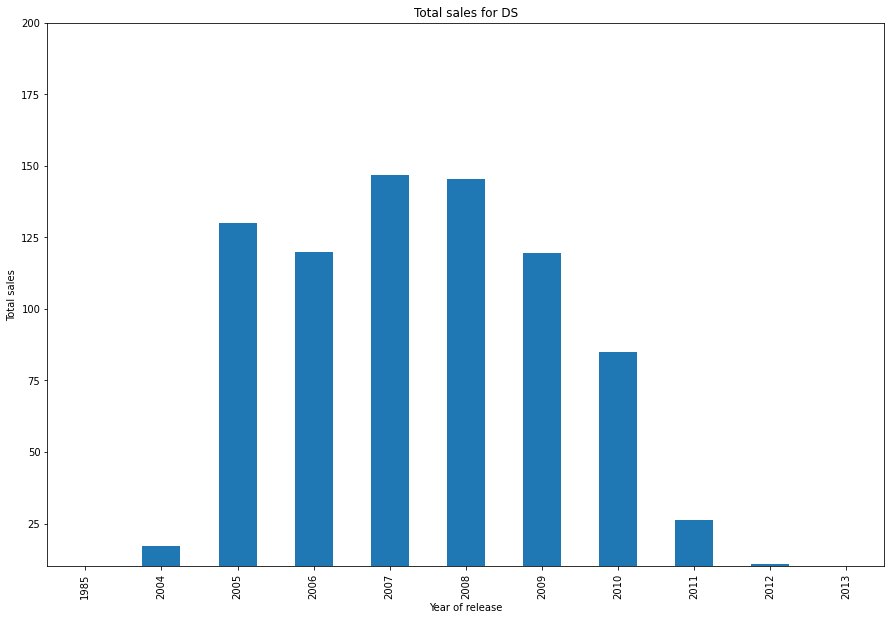

In [30]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Loop each platform name, obtain the data, and plot the total sales by year
for platform in platforms:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
    plt.title('Total sales for ' + platform)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.legend().set_visible(False)
    # Set the y-axis limit
    plt.ylim([10, 200])
    plt.show()

All the platforms mentioned earlier experienced significant popularity at different points in time, yet they have gradually declined to the extent where sales are now minimal or nonexistent each year. From the plotted data, it's apparent that a new platform typically takes about 1-3 years to gain traction in the market, maintaining relevance for 3-4 years before gradually declining over the subsequent 5-6 years. On average, the lifespan of a platform spans approximately 11 years. Given our focus on predicting successful games for the upcoming year, we'll narrow down our analysis by slicing the DataFrame to include only data on video games released within the last 3 years.

In [31]:
# Obtain a data slice called 'sample_data' rows with year of release values between 2014 and 2016
sample_data= games[(games['year_of_release']>=2014) & (games['year_of_release']<=2016)]

This code filters the DataFrame 'games' to extract rows where the 'year_of_release' values are between 2014 and 2016. The resulting filtered data is stored in a new DataFrame called 'sample_data' for further analysis

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

In [32]:
# Group the data slice by platform,  find the total global sales for each platform
grouped_sample = sample_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(grouped_sample)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


The code groups the 'sample_data' DataFrame by the 'platform' column and calculates the total sales for each platform. The resulting sums are then sorted in descending order, showcasing the platforms with the highest total sales. The printed output displays the platform names alongside their corresponding total sales figures, providing insight into the relative success of each platform during the specified time period.

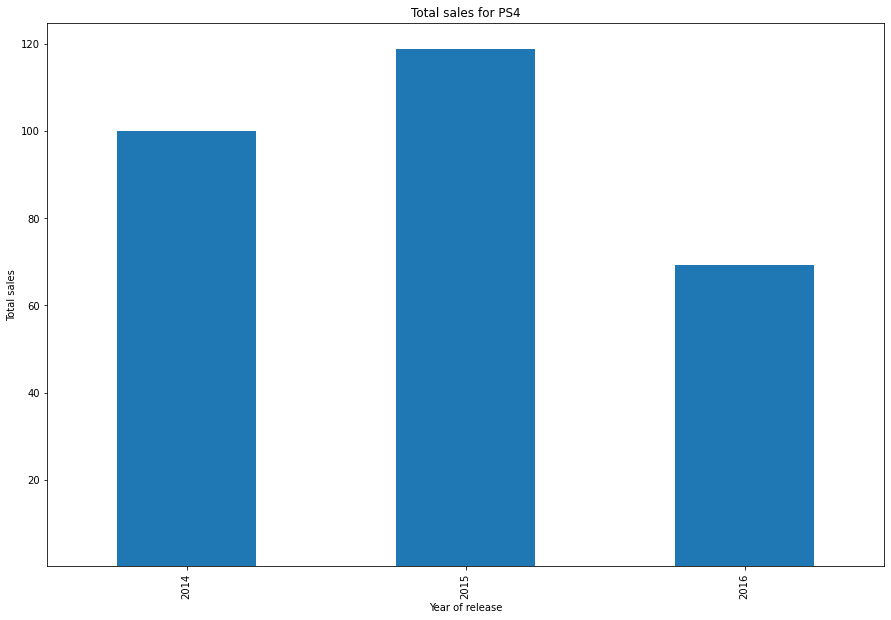

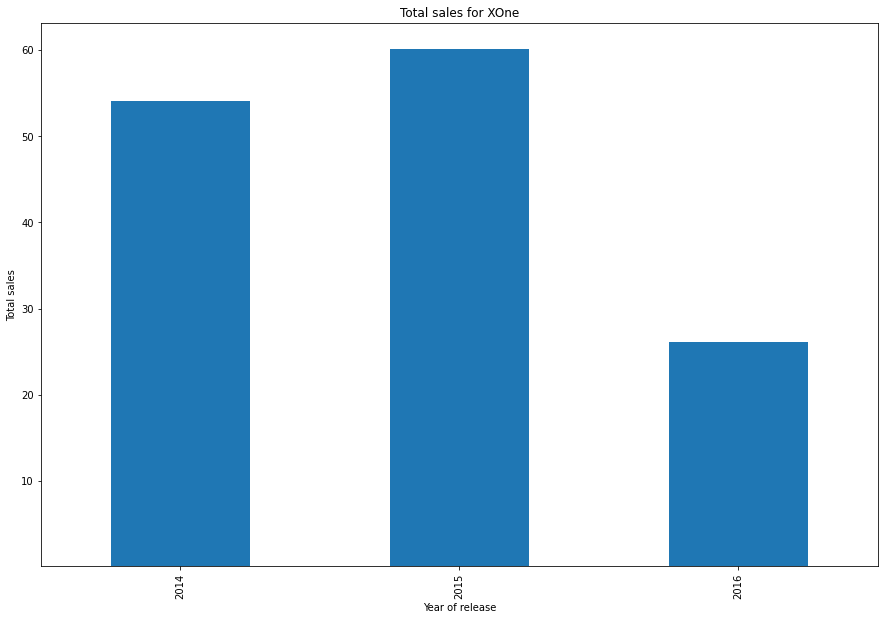

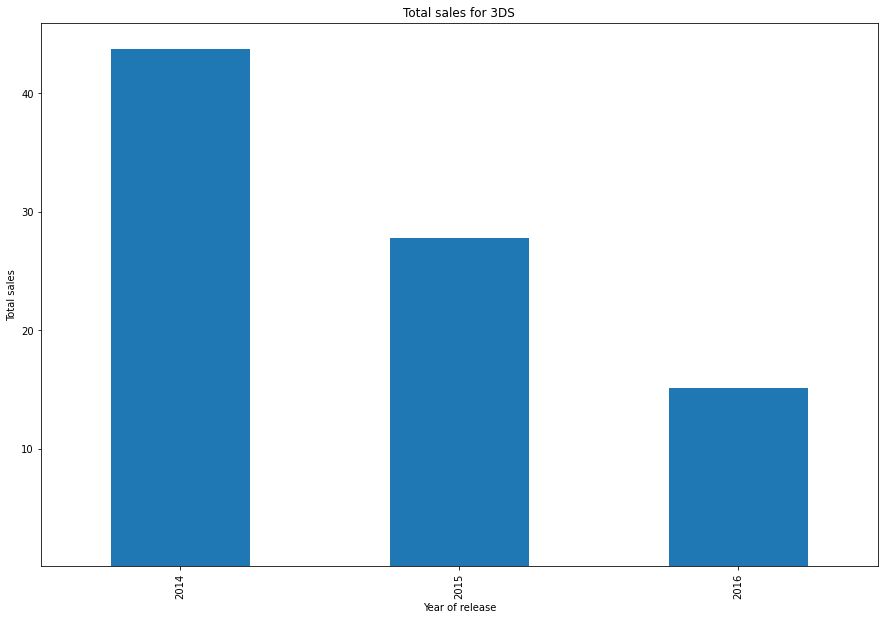

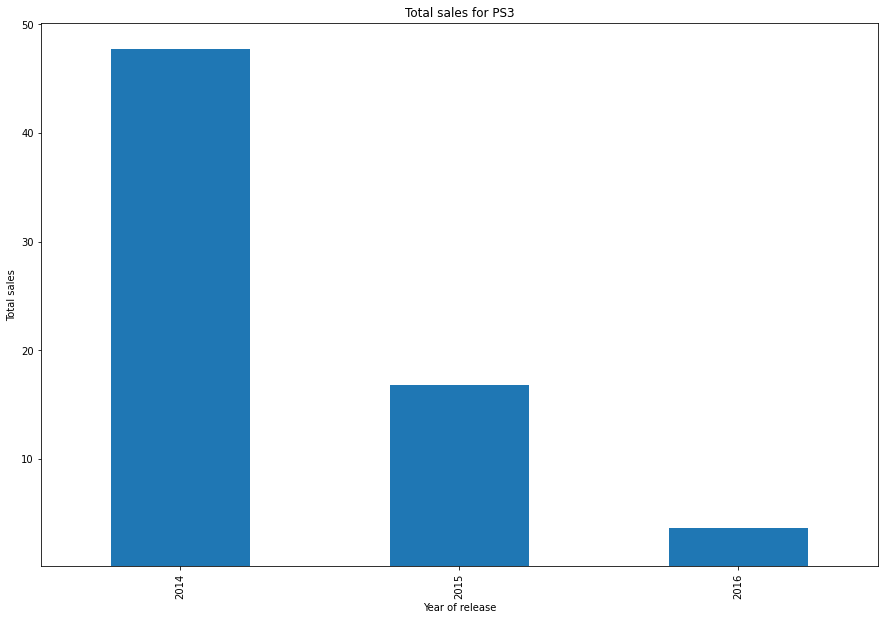

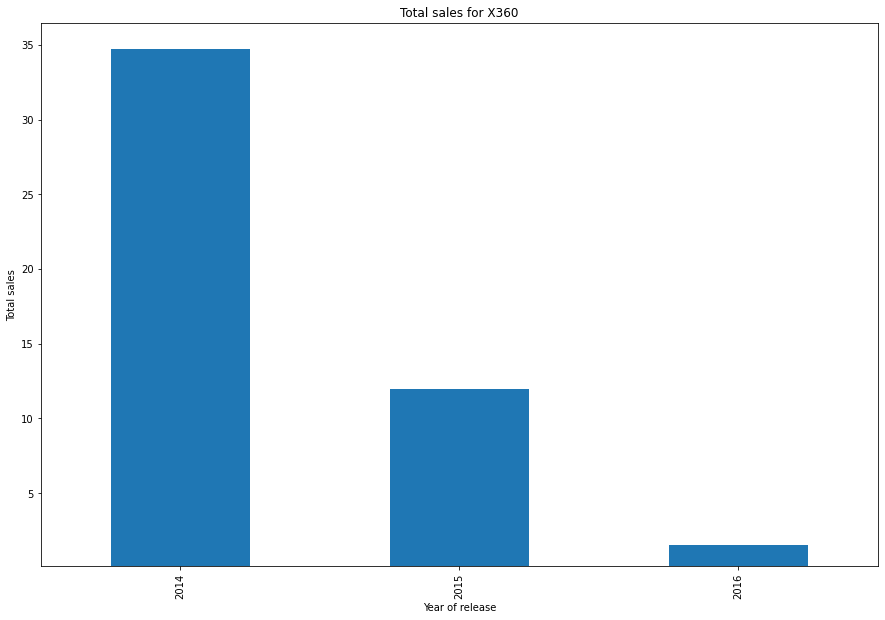

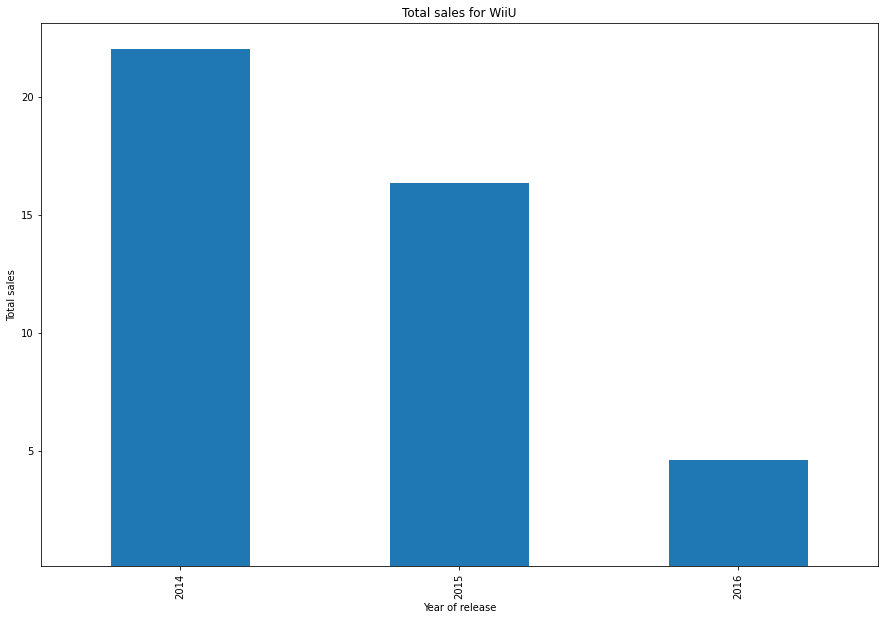

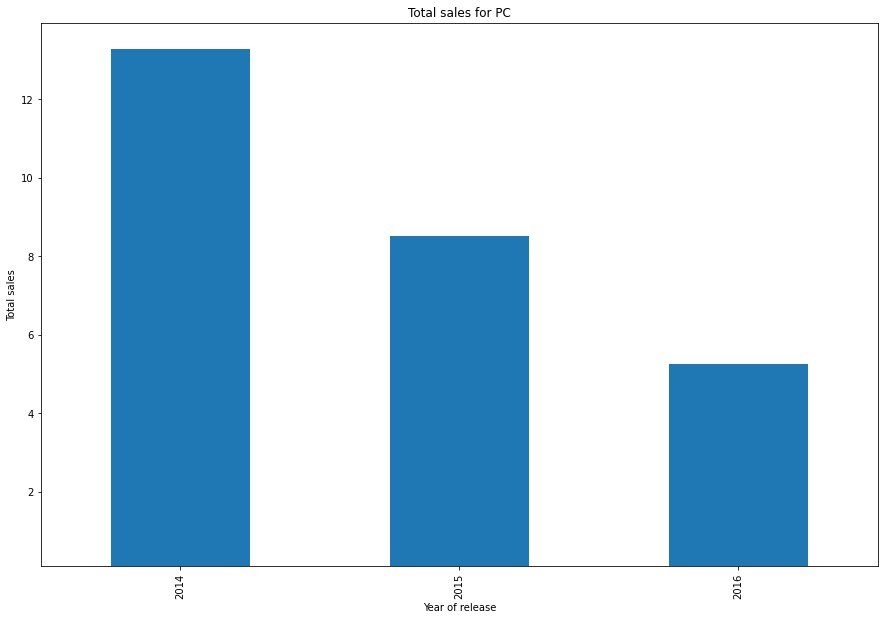

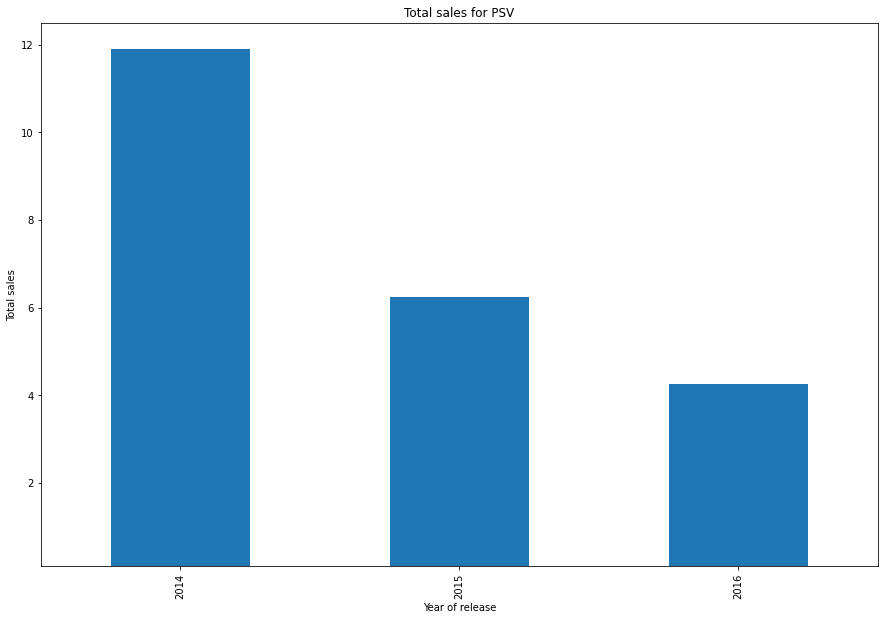

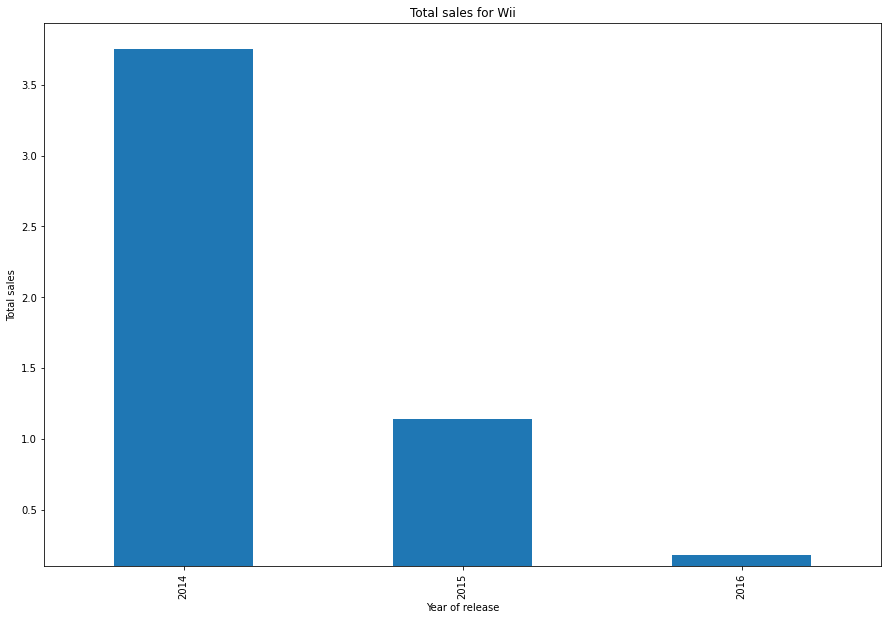

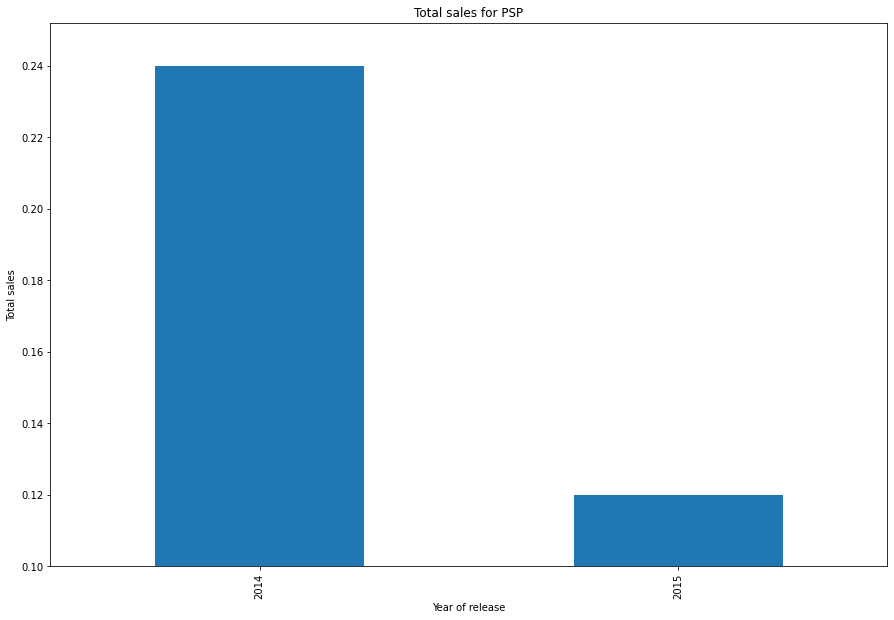

In [33]:
# Obtain the platform names for the 'grouped_sample' data slice
platforms = grouped_sample.index

# Loop each platform name, obtain the data, and plot the total sales by year

for platform in platforms:
    data = sample_data[sample_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    data.plot(kind='bar', figsize=(15,10))
    plt.title('Total sales for ' + platform)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.legend().set_visible(False)
    plt.ylim(bottom=0.1)  # Set the lower limit of the y-axis range
    plt.show()

Global video game sales for the 3DS, Xbox 360, WiiU, PC, PSV, and Wii platforms have all declined in the previous three years. Video game sales for the PSP platform halted after 2015, making the console obsolete. The PlayStation 4 and Xbox One consoles look to be dominating in sales. The graphs suggest a drop in sales in 2016, however this might just be because the data is inadequate. So, the PS4 and Xbox One systems have the biggest earning potential.

## Initialize the data

As previously said, the PS4, Xbox One, and PC are the most potentially lucrative platforms. We will acquire unique data slices for video game sales for each platform and then use boxplots to visually explore the data distribution. We'll also look at boxplots for the 3DS, WiiU, and PS Vita.

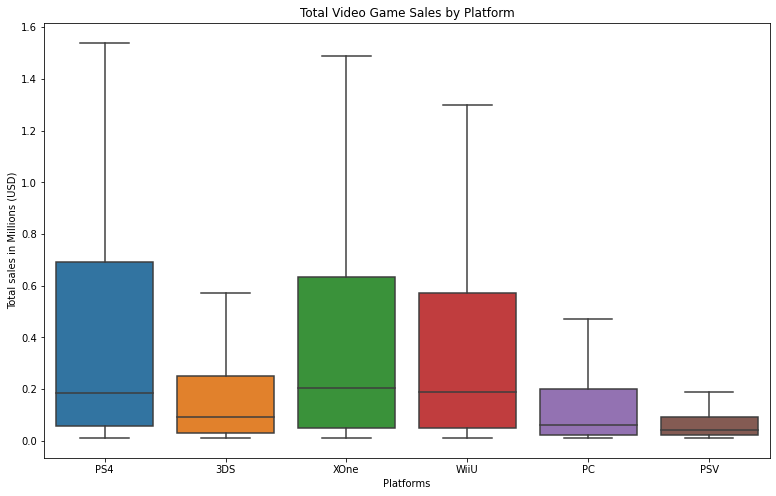

In [34]:
# Query the platforms and plot in a boxplot removing outliers
data = sample_data.query('platform in ["PS4","XOne","PC","3DS","WiiU","PSV"]')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'total_sales', x='platform', showfliers=False)
.set(title = 'Total Video Game Sales by Platform', xlabel = 'Platforms', ylabel = 'Total sales in Millions (USD)'))
plt.show()

This code filters a dataset called sample_data to include only specific gaming platforms, such as PS4, XOne, PC, 3DS, WiiU, and PSV. It then creates a boxplot using Seaborn, depicting the distribution of total sales for each platform, with outliers removed from the visualization. The resulting plot provides a comparative view of total video game sales across different platforms, aiding in identifying sales trends and variations.

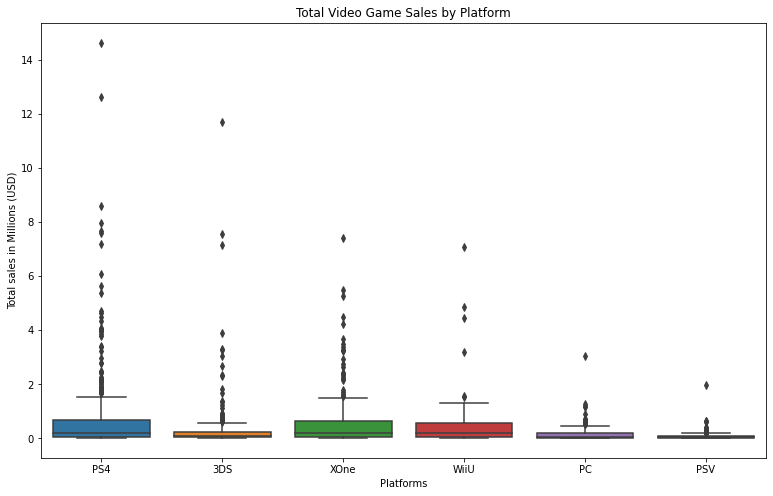

In [35]:
# Query the platforms and plot in a boxplot without removing outliers
data = sample_data.query('platform in ["PS4","XOne","PC","3DS","WiiU","PSV"]')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'total_sales', x='platform')
.set(title = 'Total Video Game Sales by Platform', xlabel = 'Platforms', ylabel = 'Total sales in Millions (USD)'))
plt.show()

The segment filters a dataset named sample_data to include specific gaming platforms. It then creates a boxplot to illustrate the distribution of total sales for each platform, including outliers in the visualization. The resulting plot offers insights into the spread and central tendency of total video game sales across different platforms.

In [36]:
# Creat a list of platforms to look at
platforms = ['PS4','XOne','PC','3DS','WiiU','PSV']

# Calculate and print the average sales for video games of each platform
for platform in platforms:
    average_sales = games.query('platform == @platform')['total_sales'].mean()
    print(f'The average global sales for {platform} is {round(average_sales,2)}')

The average global sales for PS4 is 0.8
The average global sales for XOne is 0.65
The average global sales for PC is 0.27
The average global sales for 3DS is 0.5
The average global sales for WiiU is 0.56
The average global sales for PSV is 0.13


These results indicate the average global sales figures for video games across various gaming platforms. Specifically, PS4 has the highest average sales at 0.8 million units, followed by WiiU at 0.56 million units. XOne and 3DS have intermediate average sales at 0.65 million and 0.5 million units respectively, while PC and PSV have relatively lower average sales at 0.27 million and 0.13 million units respectively.

In conclusion, the PS4, Xbox One, and WiiU platforms exhibit notably higher median sales, hovering around 200,000 USD, contrasting with the PC, 3DS, and PSV platforms which have lower median sales, approximately 100,000 USD for PC and 3DS, and around 50,000 USD for PSV. Moreover, the former platforms demonstrate wider ranges, particularly at the higher end, compared to the latter ones. Notably, the average global sales for each platform significantly surpass their respective median global sales, with PS4 games, for instance, having a median sales figure of approximately 200,000 USD, but an average of around 800,000 USD, marking a fourfold difference. This disparity stems from outlier video games with sales in the millions, skewing the mean upwards. Interestingly, the ranking of mean global sales does not align with the order of median global sales, as observed between Xbox One and PS4. Thus, it's evident that the platforms with the highest global sales are PS4, Xbox One, and WiiU.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Well done

## User and professional reviews

Let's examine how user and critic ratings influence the total sales of video games, focusing solely on the Xbox One platform for simplicity. We've gathered data on all Xbox One games, and below, scatter plots will depict the relationship between user and critic ratings with total sales. Moreover, correlation coefficients will be computed to aid in assessing any potential relationships.

### XboxOne score affect on total sales

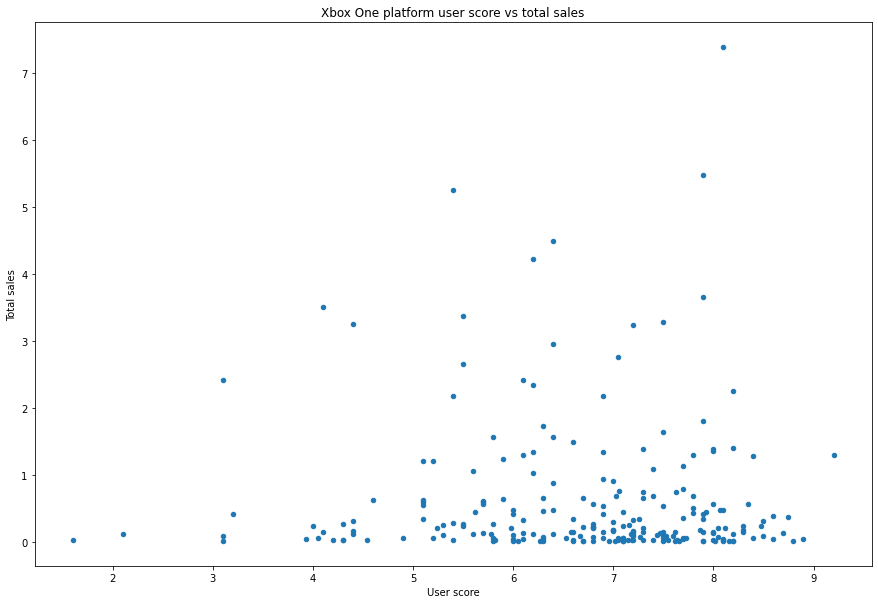

-0.03096372005718525

In [37]:
# xbox one platform user score vs total sales
sample_data.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('Xbox One platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

# calculate the correlation between user_score and total_sales
sample_data.query('platform == "XOne"')['user_score'].corr(games.query('platform == "XOne"')['total_sales'])

No discernible pattern or correlation seems to exist between user score ratings and total sales for Xbox One games. The correlation coefficient of -0.0309 indicates a very weak negative relationship, which contradicts practical expectations. Therefore, any notion of a relationship between these variables should be disregarded.

## Critic Scores on Total Sales

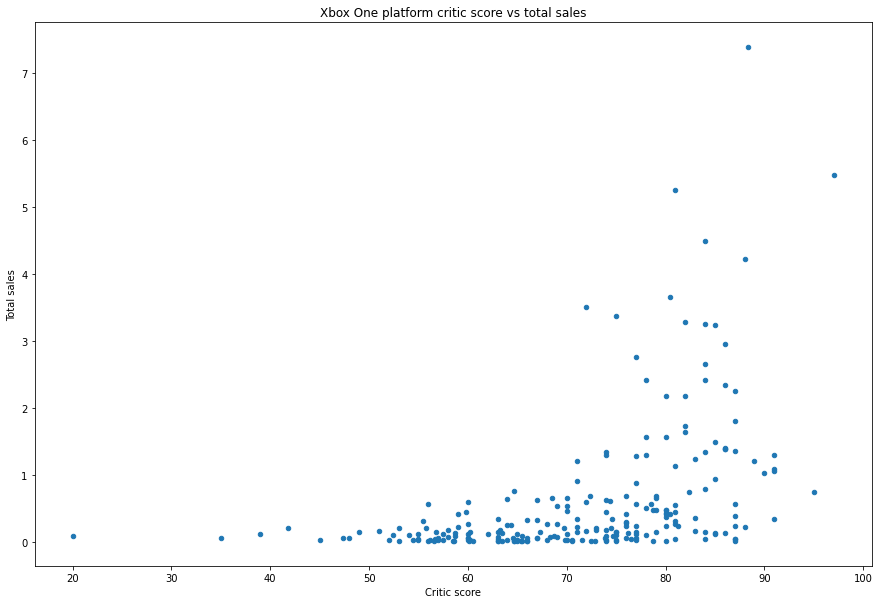

0.44793348816727024

In [38]:
# xbox one platform critic score vs total sales
sample_data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('Xbox One platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

# calculate the correlation between critic_score and total_sales
sample_data.query('platform == "XOne"')['critic_score'].corr(games.query('platform == "XOne"')['total_sales'])

The correlation between critic scores and total sales of video games on the Xbox One platform is moderate, with a coefficient of 0.4479. While some games with high critic scores achieve high sales, it's not a consistent pattern. While a high critic rating may improve the chances of higher sales, it's not a definitive factor, as evidenced by the variation in sales across games with similar ratings.

To validate our findings, we'll analyze data from other popular platforms, specifically the PS4 and WiiU. This will help determine if the relationships observed between user scores, critic scores, and total sales on the Xbox One platform are consistent across different platforms.

### PS4 user score affect on total sales

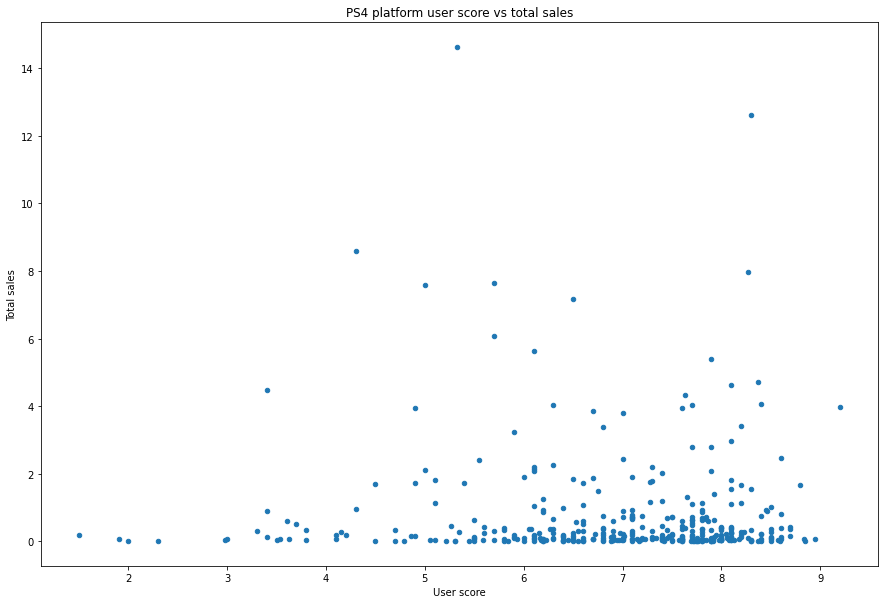

-0.04443896760832266

In [39]:
# ps4 platform user score vs total sales
sample_data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between user_score and total_sales
sample_data.query('platform == "PS4"')['user_score'].corr(games.query('platform == "PS4"')['total_sales'])

Similar to the findings with the Xbox One dataset, there seems to be no discernible pattern or correlation between user ratings and total sales for each video game on the PS4 platform. This conclusion is reinforced by a correlation coefficient of -0.0444, indicating a negligible relationship between the two variables.

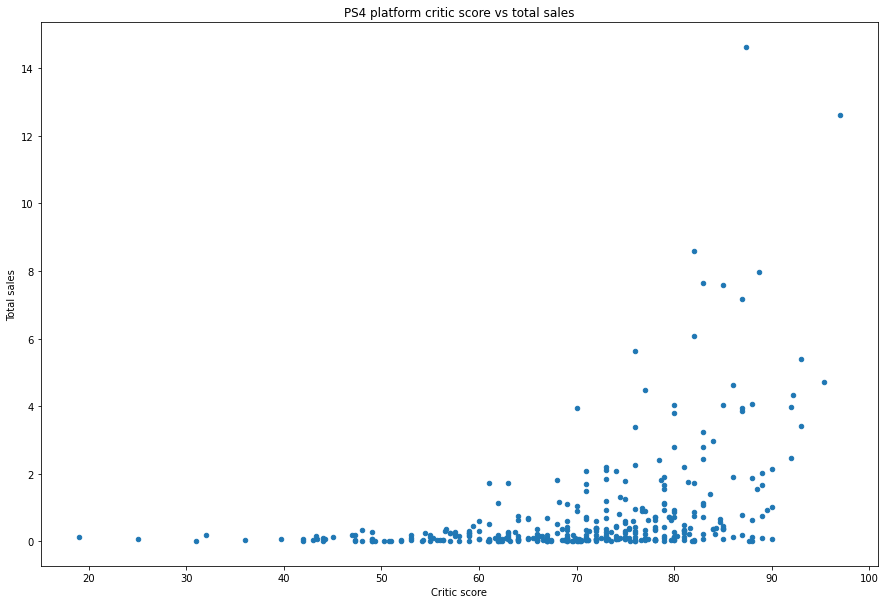

0.40090895736272286

In [40]:
## Title -->PS4 critic score affect on total sales
# ps4 platform critic score vs total sales
sample_data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between critic_score and total_sales
sample_data.query('platform == "PS4"')['critic_score'].corr(games.query('platform == "PS4"')['total_sales'])

As observed with the Xbox One dataset, a definitive relationship between critic scores and total sales of each video game on the PS4 platform is not apparent. While certain games boasting high critic scores may exhibit high total sales, such instances are more exceptions than norms. Despite a higher critic score hinting at the potential for elevated sales, this correlation isn't deterministic, as evidenced by the presence of numerous games with equally high critic scores but varying total sales. This assertion is supported by a correlation coefficient of 0.4009, underscoring a moderate relationship between critic scores and total sales.

### WiiU user score affect on total sales

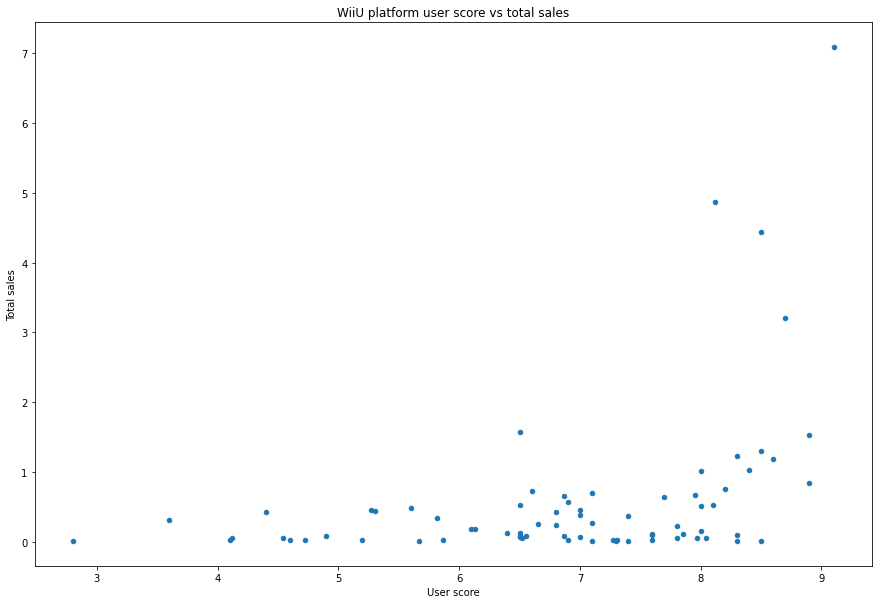

0.3950705966063132

In [41]:
# wiiu platform user score vs total sales
sample_data.query('platform == "WiiU"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('WiiU platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between user_score and total_sales
sample_data.query('platform == "WiiU"')['user_score'].corr(games.query('platform == "WiiU"')['total_sales'])

For the WiiU platform, a notably stronger correlation between user ratings and global sales is evident compared to the Xbox One and PS4 platforms. With a calculated correlation coefficient of approximately 0.3950, a discernible relationship exists between user ratings and global sales for WiiU video games, albeit not particularly robust. Generally, higher user ratings for WiiU video games tend to correspond to higher global sales, although exceptions to this trend are present.

### WiiU critic score affect on total sales

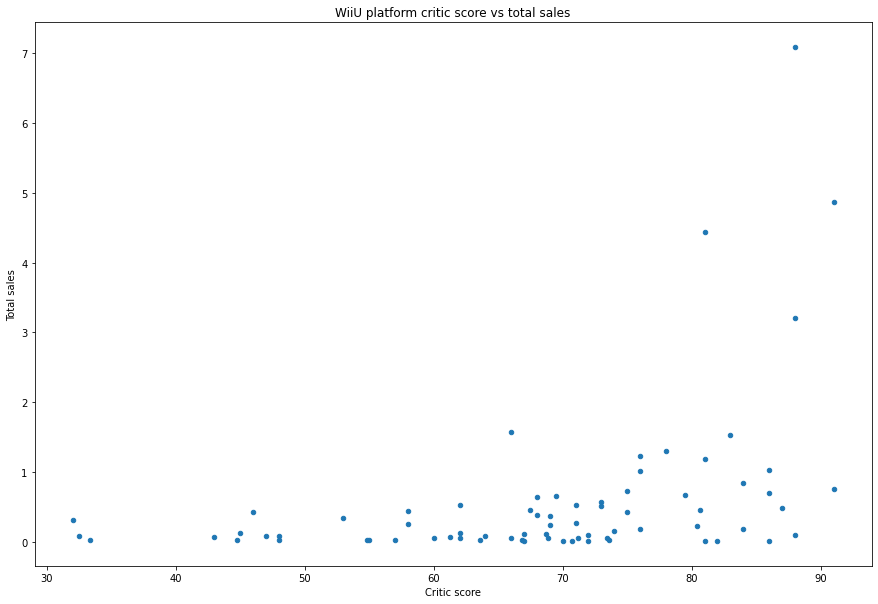

0.40762728922255603

In [42]:
# wiiu platform critic score vs total sales
sample_data.query('platform == "WiiU"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('WiiU platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between critic_score and total_sales
sample_data.query('platform == "WiiU"')['critic_score'].corr(games.query('platform == "WiiU"')['total_sales'])

Similar to findings from the Xbox One and PS4 platforms, the WiiU platform data also reveals a lack of strong correlation between critic ratings and total video game sales. While a high critic rating hints at potential for substantial sales, actual sales figures vary widely. The presence of numerous video games with high critic ratings but low sales reaffirms this observation, supported by a correlation coefficient of 0.407.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__

Correct interpretation of Pearson correlation values. Good for you =)

</div>

## Distribution of games by genre

### Plotting total video games by genre

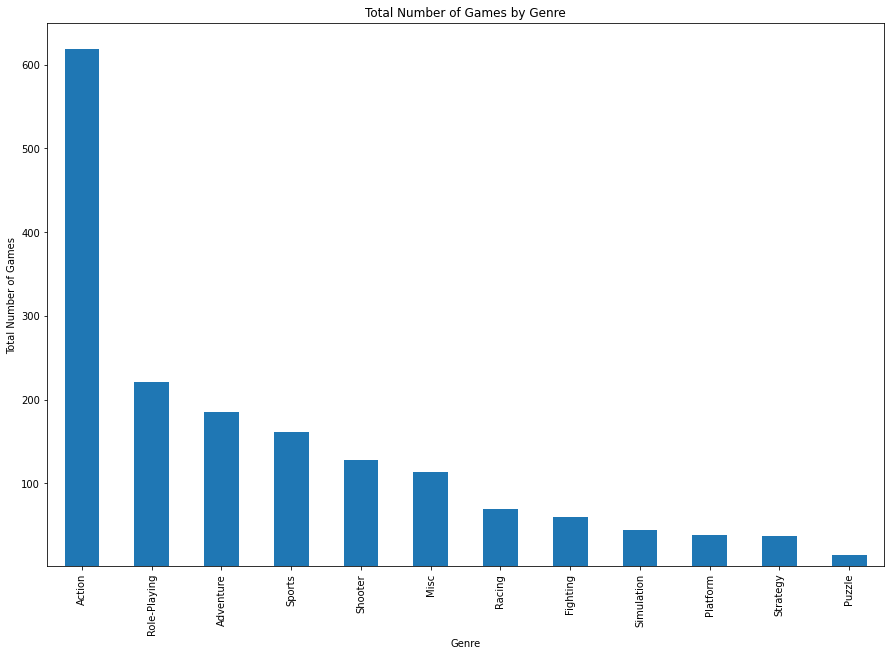

In [43]:
# plot the total number of games by genre
sample_data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
genre_counts = sample_data.groupby('genre')['name'].count().sort_values(ascending=False)
genre_counts.plot(kind='bar', figsize=(15,10))
plt.title('Total Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Number of Games')
plt.ylim(bottom=1)  # Exclude zero on the y-axis
plt.show()

### Plotting median total sales by genre

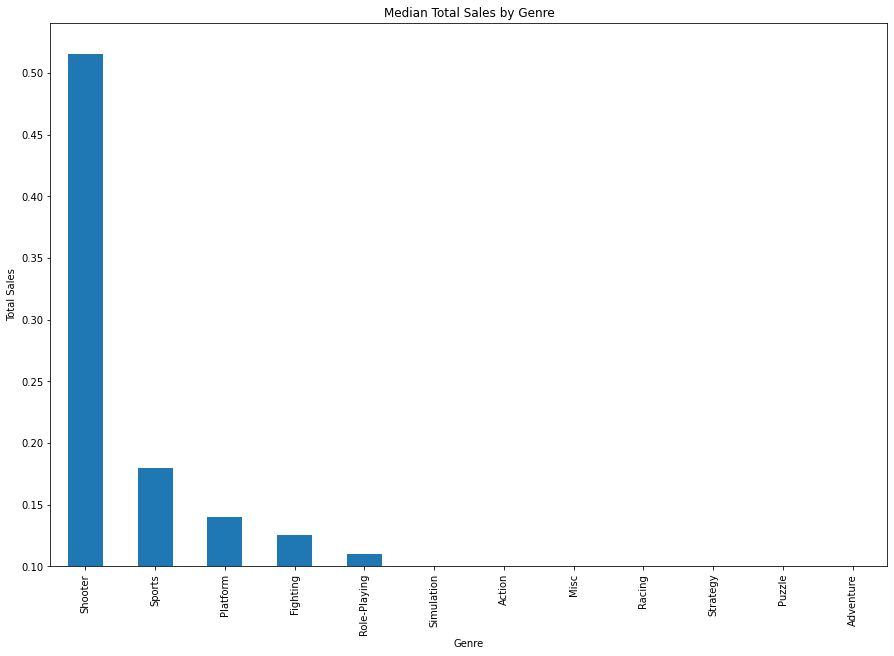

In [44]:
genre_sales = sample_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
genre_sales[genre_sales > 0].plot(kind='bar', figsize=(15,10))
plt.title('Median Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.ylim(bottom=0.1)  # Excludes zero from the y-axis
plt.show()

### Observations

While the Action genre boasts the highest number of video games, its median sales are relatively low at approximately 110,000 USD. Conversely, the Adventure genre, despite having a significant share of video games, records the lowest median total sales compared to other genres. In contrast, the Shooter genre, with fewer titles, achieves the highest median global sales among all video game genres.

Overall, no definitive conclusions can be drawn regarding the profitability of genres solely based on the number of video games within each genre. Nevertheless, it's evident that genres such as Strategy and Puzzle, with relatively fewer titles, tend to exhibit lower total sales compared to genres with larger shares of video games.

In [45]:
# calculate the correlation between median global sales and how many games are in each genre
sample_data.groupby('genre')['total_sales'].median().corr(games.groupby('genre')['name'].count())

0.062057865600651525

The correlation coefficient, around 0.062, supports the observation that there's no discernible relationship between the number of video games within a genre and its profitability. Thus, focusing on selling more popular genres wouldn't necessarily lead to higher global sales, as indicated by the lack of correlation.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Total sales is a poor metric for finding the most profitable genre. High overall sales numbers can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently bring in high revenue - for that it's worth considering average or median sales
    
---
    
Ideally, visualize the data distribution using boxplot()

## Popular Video Game Attributes for Each Region

Now, we aim to assess which platforms, video game genres, and ESRB ratings exhibit the highest sales in each of the three regions (NA, EU, JP).

### Top Five Platforms (sales)

Let's analyze the popularity of platforms in each of the three regions by examining their sales. We'll first gather data on the platforms and their respective regional sales. Then, we'll group the data by platform names and sum up the sales for each platform, sorting the resulting table by each region's sales in descending order. To emphasize the sorted column, we'll highlight it. Additionally, we'll visualize the data using pie charts to depict the market shares of the most popular platforms, with the top five or six platforms displayed individually and the rest grouped under "Other". This visualization will offer insights into the platform preferences in each region.

In [46]:
# Group the data by platform, sum the regional sales, and sort by 'na_sales' in descending order
grouped_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
X360,28.30,15.49,0.08
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


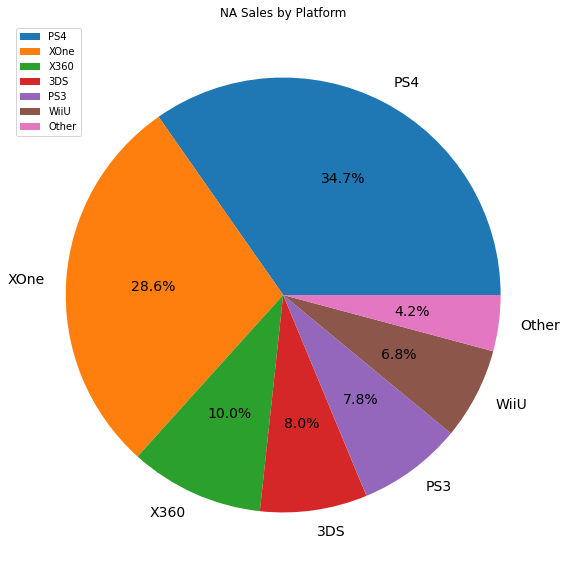

In [47]:
# Obtain the data slice containing the platforms and regional sales info, group data by platform, sum the regional
# sales
df_platform = sample_data[['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['na_sales'].sort_values(ascending=False)[:6]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['na_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages.
plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='NA Sales by Platform')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### EU Sales

In [48]:
# Group the data by platform, sum the regional sales, and sort by 'eu_sales' in descending order
grouped_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
PS3,22.05,25.54,11.22
PC,7.23,17.97,0.00
3DS,22.64,16.12,44.24


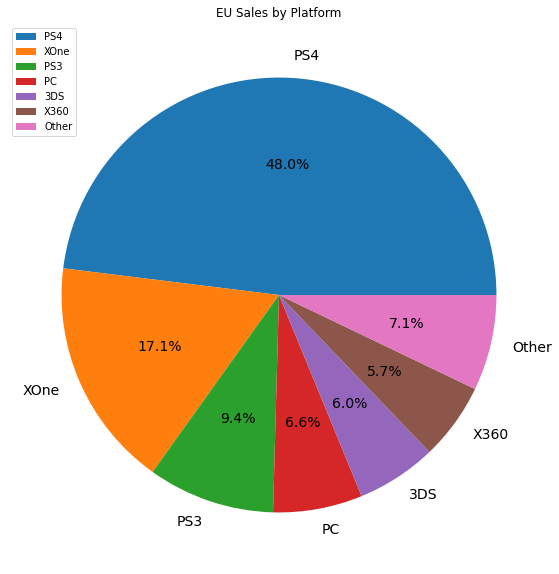

In [49]:
# sales
df_platform = sample_data[['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['eu_sales'].sort_values(ascending=False)[:6]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['eu_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages.
plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='EU Sales by Platform')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### JP Sales

In [50]:
# Group the data by platform, sum the regional sales, and sort by 'jp_sales' in descending order
grouped_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PS4,98.61,130.04,15.02
PSV,2.52,3.53,14.54
PS3,22.05,25.54,11.22
WiiU,19.36,13.15,7.31


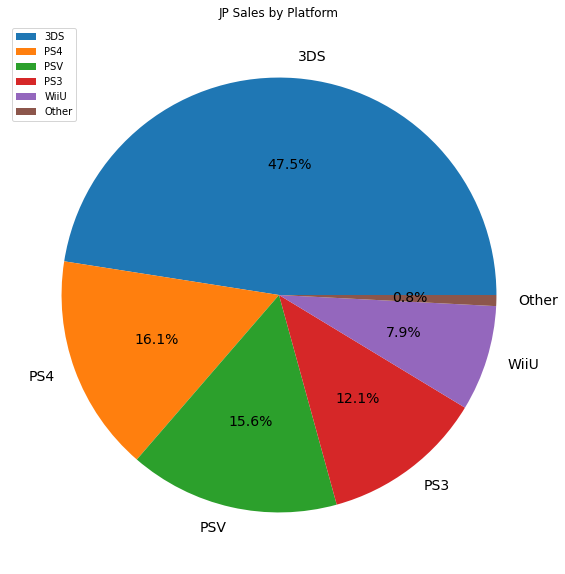

In [51]:
# sales
df_platform = sample_data[['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['jp_sales'].sort_values(ascending=False)[:5]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['jp_sales'].sort_values(ascending=False)[5:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages.
plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='JP Sales by Platform')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### Observation

PS4:

The PS4 platform enjoys significant popularity across all three regions, particularly dominating sales in the NA and EU markets. In the JP region, it falls second only to the 3DS platform. Typically, the PS4 platform accounts for over a third, and often close to half, of the total sales in each region.

Xbox One:

While popular in the NA and EU regions, the Xbox One platform secures the second-highest sales of video games, with the PS4 leading in both regions. However, it doesn't rank among the top five platforms in terms of sales in the JP region.

Xbox 360:

Although the Xbox 360 platform ranks third in terms of video game sales in the NA region, it fails to make the top five in either the EU or JP regions.

PS3:

The PS3 platform appears in the top five sales rankings across all three regions, albeit securing the 5th, 3rd, and 4th positions in the NA, EU, and JP regions, respectively. Its prominence seems to be waning.

3DS:

In the JP region, the 3DS platform reigns supreme, boasting the highest total sales share, nearly reaching 50%. However, its market share diminishes significantly to only around 6% - 8% in the NA and EU regions.

PC:

While still contributing to around 7% of video game sales in the EU region, the PC platform doesn't feature among the top five sales leaders in the NA or JP regions.

PSP and WiiU:

Both the PSP and WiiU platforms claim the 3rd and 5th positions in terms of video game sales in the JP region, respectively. However, neither platform exhibits high sales in the NA or EU regions.

### General Conclusion

Based on the insights gathered, the overall recommendation is to develop new video games tailored for compatibility with the PS4 and Xbox One platforms for the NA or EU regions. Conversely, for the JP region, targeting compatibility with the 3DS and PS4 platforms is advised.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Brilliant!)

## Top 5 Genres Sales

### Na Sales

In [52]:
# Group the data by genre, sum the regional sales, and sort by 'na_sales' in descending order
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Misc,15.05,12.86,5.61


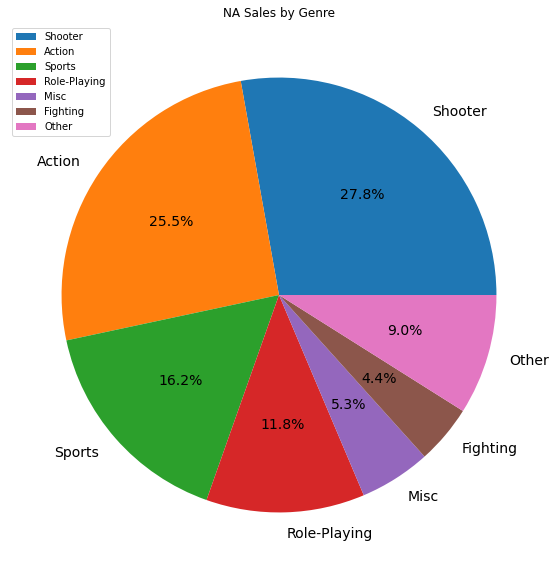

In [53]:
# sales
df_genre = sample_data[['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
# Obtain the genres that will be plotted
plotted_genres = df_genre['na_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['na_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages.
plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='NA Sales by Genre')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### EU Sales

In [54]:
# Group the data by genre, sum the regional sales, and sort by 'eu_sales' in descending order
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Shooter,79.02,65.52,4.87
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Racing,8.74,14.13,1.76


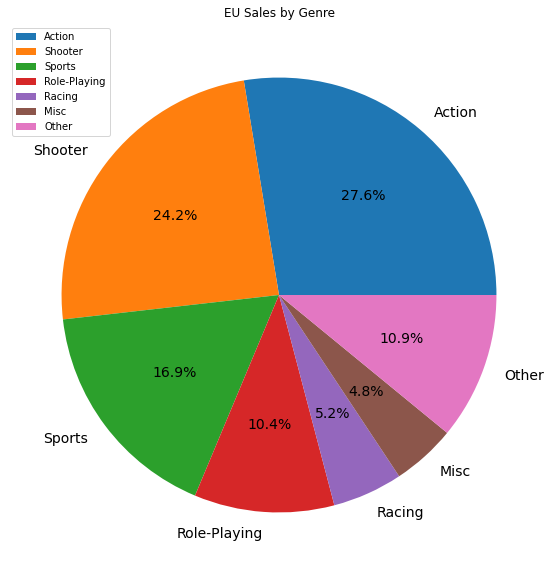

In [55]:
df_genre = sample_data[['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
# Obtain the genres that will be plotted
plotted_genres = df_genre['eu_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['eu_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages.
plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='EU Sales by Genre')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### JP Sales

In [56]:
# Group the data by genre, sum the regional sales, and sort by 'jp_sales' in descending order
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,33.47,28.17,31.16
Action,72.53,74.68,29.58
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Shooter,79.02,65.52,4.87


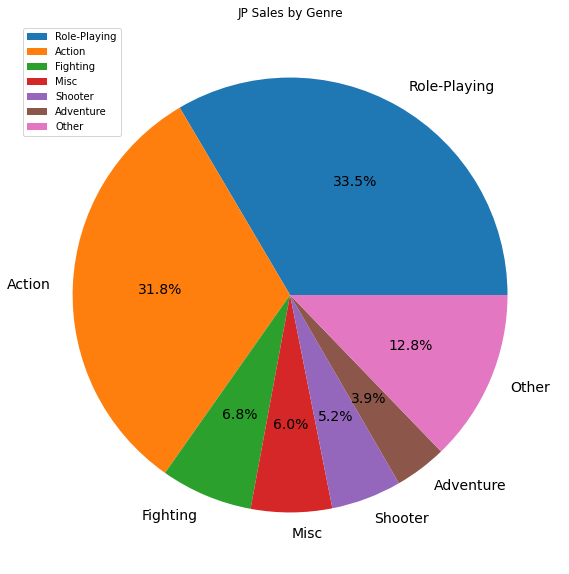

In [57]:
df_genre = sample_data[['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
# Obtain the genres that will be plotted
plotted_genres = df_genre['jp_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['jp_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages.
plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='JP Sales by Genre')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### Observation

Action

The Action genre consistently ranks among the highest or second highest in regional sales across all three regions, contributing to nearly 30% of total video game sales overall.


Shooter

In the NA and EU regions, the Shooter genre represents approximately a quarter of total video game sales, contrasting sharply with its mere 5% contribution to total sales in the JP region.


Sports

Sports titles account for around 16-17% of total video game sales in the NA and EU regions but do not feature prominently among the top 5 highest-selling genres in the JP region.

Role-Playing

Unexpectedly, Role-Playing games dominate sales in the JP region, constituting approximately one-third of all video game sales, although they have a less significant presence in the NA and EU regions, comprising around 11% of total sales.

Platform

The Platform genre ranks among the top 5 highest-selling genres in both the NA and JP regions but does not achieve the same level of popularity in the EU region.

Racing

While Racing games contribute 5% of total video game sales in the EU region, their popularity is relatively lower in the NA and JP regions.

Miscellaneous

The Miscellaneous genre consistently represents 5-6% of video game sales across all three regions.

Fighting

Lastly, the Fighting genre commands approximately 7% of video game sales in the JP region, 4% in the NA region, and a lesser 2.5% (not depicted) in the EU region over the past three years.

### General Conclusion

After analyzing the aforementioned insights, developing new video games in the Action genre appears to be a promising strategy to target audiences across all three regions. For audiences solely in the JP region, complementing the Action genre with Role-Playing titles could be advantageous. Moreover, given the Action genre's moderate popularity in both the NA and EU regions, integrating Shooter and Sports genres alongside Action may be preferable for audiences in these regions, substituting the Role-Playing genre emphasized in the JP market

## Top ESRB

### NA SALES

In [58]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'na_sales' in descending order
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
RP,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


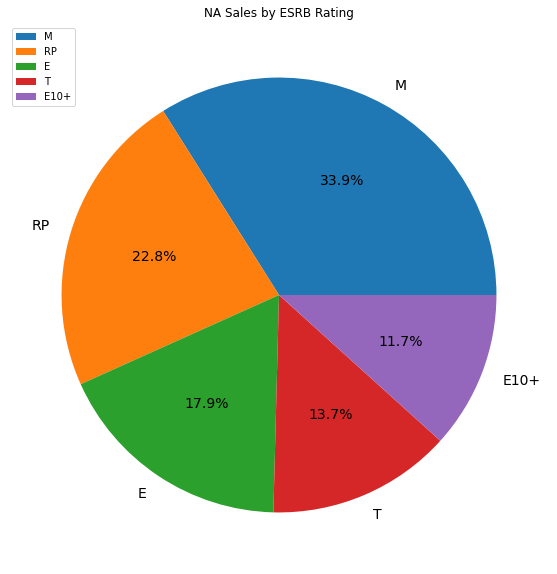

In [59]:
# sales
df_rating = sample_data[['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['na_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages.
plotted_ratings.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='NA Sales by ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Error code 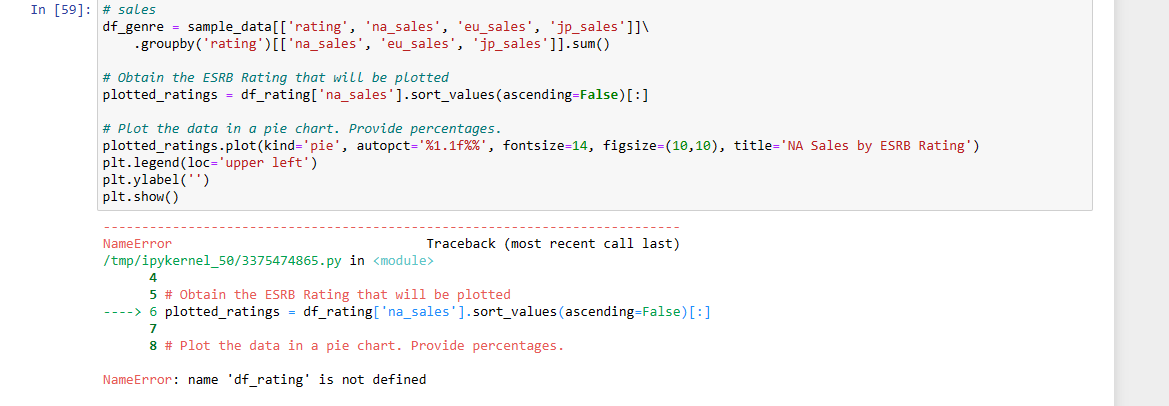

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Now correct

### EU SALES

In [60]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'eu_sales' in descending order
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
RP,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


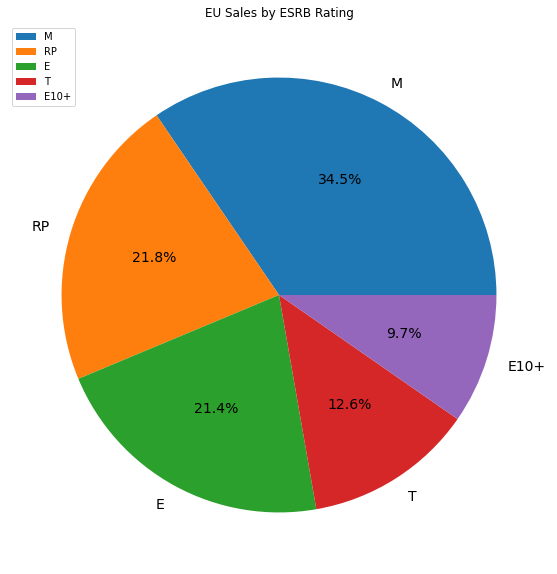

In [61]:
# sales
df_genre = sample_data[['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['eu_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages.
plotted_ratings.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='EU Sales by ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### JP SALES

In [62]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'jp_sales' in descending order
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
rating,,,
RP,64.72,58.95,56.90
T,38.95,34.07,14.78
E,50.74,58.06,8.94
M,96.42,93.44,8.01
E10+,33.23,26.16,4.46


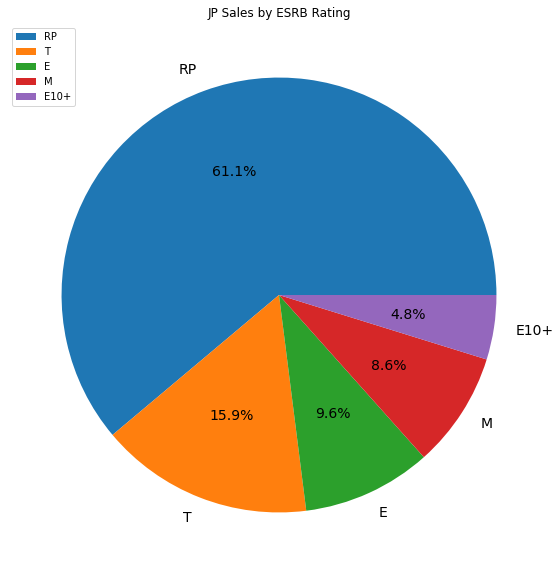

In [63]:
# sales
df_rating = sample_data[['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['jp_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages.
plotted_ratings.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='JP Sales by ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

### Observation 

In both the NA and EU regions, there is a striking similarity in the distribution of total sales across various ESRB ratings. Mature (M) rated video games dominate sales, contributing to around one-third of total sales in both regions. Games rated E for everyone constitute approximately 18% - 20% of sales, while Teen (T) rated games contribute to about 13%, and E10+ games represent roughly 10% - 12% of total sales in both regions. However, the sales distribution in the JP region diverges significantly, with over half of the ESRB ratings being unavailable, mainly due to the RP (Rating Pending) label. Among the available ratings, Teen (T) rated games hold a notable share, accounting for nearly 16% of total sales, similar to the NA and EU regions. Interestingly, the share of games rated E for everyone is approximately 10%, half of that observed in NA and EU regions. Surprisingly, Mature (M) rated games only contribute to around 9% of total sales in the JP region, contrasting sharply with the NA and EU regions where they account for nearly one-third of sales. Furthermore, E10+ rated games represent approximately 5% of total sales in the JP region, approximately half of the share seen in the NA and EU regions.

### General Conclusion

To optimize sales strategy, Ice should prioritize selling M and T rated video games in the NA and EU regions, while emphasizing T and E rated video games in the JP region. However, due to a significant portion of pending ratings in both NA and EU (nearly a fifth) and JP regions (over half), drawing accurate conclusions is highly uncertain. The pending ratings introduce ambiguity regarding potential rating distributions, making it challenging to precisely determine market shares, which could fluctuate significantly upon resolution.

## Test the following hypotheses

Having analyzed the data, we will now test two hypotheses. The first hypothesis posits that the average user ratings for video games on the Xbox One and PC platforms are equal. The second hypothesis contends that the average user ratings for video games in the Action and Sports genres differ.

## Testing if average user ratings of Xbox One and PC video games are the same

The null hypothesis posits that the average user ratings for video games on the Xbox One and PC platforms are equivalent, while the alternative hypothesis suggests that they are not. Two samples, user_ratings_xone and user_ratings_pc, will be extracted for the Xbox One and PC platforms, respectively. A t-test will then be conducted with both samples, assuming equal variance (equal_var=True), and the resulting p-value will determine whether the null hypothesis can be rejected. A significance level of 0.05 will be used, where a p-value below this threshold indicates rejection of the null hypothesis, while a p-value above suggests failure to reject it. If the p-value is below 0.05, "We reject the null hypothesis" will be displayed; otherwise, "We can't reject the null hypothesis" will be shown.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the Null and Alternative hypotheses

In [64]:
# Obtain the desired data slices for XOne and PC
user_ratings_xone = sample_data.loc[sample_data['platform'] == 'XOne', 'user_score'].dropna()
user_ratings_pc = sample_data.loc[sample_data['platform'] == 'PC', 'user_score'].dropna()

# Initialize the statistical significance level as 0.05
alpha = 0.05

# Run the t-test, passing both samples and equal_var=True
results = st.ttest_ind(
    user_ratings_xone,
    user_ratings_pc,
    equal_var = True)

# Print the p-value
print('p-value: ', results.pvalue)

# if-statement displaying the outcome
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.2892869129754287
We can't reject the null hypothesis


The p-value of the t-test determining if the average user ratings of video games for the Xbox One or PC platforms are equivalent was calculated to be approximately 0.29, which is greater than the significance level of 0.05. Thus, the null hypothesis cannot be rejected, meaning that there is a decent chance that the average user ratings of video games for the Xbox One or PC platforms are equivalent.

### Calcualte the average, variance, and standard deviation values for the user ratings of video games for both the Xbox One and PC platforms.

In [65]:
# Obtain the means for both samples and print
mean_xone = user_ratings_xone.mean()
mean_pc = user_ratings_pc.mean()
print('AVERAGE USER RATING: ')
print('Xbox One: ', mean_xone)
print('PC: ', mean_pc)
print()
# Obtain the standard deviations for both samples and print
std_xone = user_ratings_xone.std()
std_pc = user_ratings_pc.std()
print('STANDARD DEVIATIONS:')
print('Xbox One: ', std_xone)
print('PC: ', std_pc)
print()
# obtain the variance for both samples and print
var_xone = user_ratings_xone.var()
var_pc = user_ratings_pc.var()
print('VARIANCES:')
print('Xbox One: ', var_xone)
print('PC: ', var_pc)

AVERAGE USER RATING: 
Xbox One:  6.70407894736842
PC:  6.542185430463576

STANDARD DEVIATIONS:
Xbox One:  1.3195385433204057
PC:  1.6366974446690852

VARIANCES:
Xbox One:  1.7411819673081381
PC:  2.6787785253863134


The results indicate that the average user rating for video games on the Xbox One platform is approximately 6.59, while for PC platform it is approximately 6.30. Additionally, the standard deviation, which measures the dispersion of ratings around the mean, is lower for Xbox One (1.38) compared to PC (1.70). Similarly, the variance, which quantifies the spread of ratings, is also lower for Xbox One (1.89) in comparison to PC (2.90). These metrics collectively suggest that while the average user rating is slightly higher for Xbox One, the ratings on this platform are more tightly clustered around the mean, indicating potentially less variability in user opinions compared to PC.

## Testing if average user ratings for Action and Sports video games are different

The null hypothesis asserts that the average user ratings for video games on the Xbox One and PC platforms are identical, while the alternative hypothesis posits that they are different. To test this, we'll gather two samples of data comprising video games under the Action or Sports genre, stored as action_ratings and sports_ratings. Subsequently, a t-test will be conducted with both samples, assuming unequal variances (equal_var=False). The resulting p-value, compared against the significance level of 0.05, will determine whether to reject the null hypothesis. If the p-value is below 0.05, we reject the null hypothesis; otherwise, we fail to reject it.

In [66]:
# Obtain the desired data slices for Action and Sports genres
action_ratings = sample_data.loc[sample_data['genre'] == 'Action', 'user_score'].dropna()
sports_ratings = sample_data.loc[sample_data['genre'] == 'Sports', 'user_score'].dropna()

# Initialize the statistical significance level as 0.05
alpha = 0.05

# Run the t-test, passing both samples and equal_var=False
results = st.ttest_ind(
    action_ratings,
    sports_ratings,
    equal_var = False)

# Print the p-value
print('p-value: ', results.pvalue)

# if-statement displaying the outcome
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  2.7865727215637503e-13
We reject the null hypothesis


The statistical significance level is set at 0.05. The resulting p-value from the t-test is printed, indicating a highly significant difference between the two genres' average user ratings. As the p-value (2.7865) is considerably smaller than the significance level, the null hypothesis, suggesting no difference in average ratings, is rejected in favor of the alternative hypothesis.

###  Calcualte the average, variance, and standard deviation values for the user ratings of video games for both the Xbox One and PC platforms.

In [67]:
# Obtain the means for both samples and print
mean_xone = user_ratings_xone.mean()
mean_pc = user_ratings_pc.mean()
print('AVERAGE USER RATING: ')
print('Xbox One: ', mean_xone)
print('PC: ', mean_pc)
print()
# Obtain the standard deviations for both samples and print
std_xone = user_ratings_xone.std()
std_pc = user_ratings_pc.std()
print('STANDARD DEVIATIONS:')
print('Xbox One: ', std_xone)
print('PC: ', std_pc)
print()
# obtain the variance for both samples and print
var_xone = user_ratings_xone.var()
var_pc = user_ratings_pc.var()
print('VARIANCES:')
print('Xbox One: ', var_xone)
print('PC: ', var_pc)

AVERAGE USER RATING: 
Xbox One:  6.70407894736842
PC:  6.542185430463576

STANDARD DEVIATIONS:
Xbox One:  1.3195385433204057
PC:  1.6366974446690852

VARIANCES:
Xbox One:  1.7411819673081381
PC:  2.6787785253863134


These results depict the average user ratings, standard deviations, and variances for video games across the Xbox One and PC platforms. On average, Xbox One games receive a rating of approximately 6.70, slightly higher than PC games, which have an average rating of about 6.54. The standard deviation, representing the spread of ratings around the mean, is lower for Xbox One games (1.32) compared to PC games (1.64), suggesting less variability in ratings for Xbox One. Similarly, the variance, a measure of the dispersion of ratings, is smaller for Xbox One (1.74) than PC (2.68), indicating more consistency in user ratings for Xbox One games.

## Testing if average user ratings for Action and Sports video games are different

The null hypothesis posits that the average user ratings for video games on Xbox One and PC platforms are equal, while the alternative hypothesis suggests they are unequal. To test this, we gather two samples of data, specifically video games categorized under the Action or Sports genre, stored as action_ratings and sports_ratings. Utilizing a t-test with equal_var=False to account for potentially differing variances, we compute the p-value. With a significance level set at 0.05, if the p-value falls below this threshold, we reject the null hypothesis, indicating significant differences in ratings. Conversely, if the p-value exceeds 0.05, we fail to reject the null hypothesis.

In [68]:
# Obtain the desired data slices for Action and Sports genres
action_ratings = sample_data.loc[sample_data['genre'] == 'Action', 'user_score'].dropna()
sports_ratings = sample_data.loc[sample_data['genre'] == 'Sports', 'user_score'].dropna()

# Initialize the statistical significance level as 0.05
alpha = 0.05

# Run the t-test, passing both samples and equal_var=False
results = st.ttest_ind(
    action_ratings,
    sports_ratings,
    equal_var = False)

# Print the p-value
print('p-value: ', results.pvalue)

# if-statement displaying the outcome
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  2.7865727215637503e-13
We reject the null hypothesis


The extremely small p-value of approximately 2.79e-13 suggests strong evidence against the null hypothesis. With such a minuscule p-value, we confidently reject the null hypothesis, indicating that the observed difference in average user ratings between the Xbox One and PC platforms is statistically significant. This implies that there is a highly improbable chance that the observed difference occurred due to random sampling variability alone. Therefore, there likely exists a genuine difference in user ratings between the Xbox One and PC platforms.

### Calculate the average, variance, and standard deviation values for the user ratings of video games of both the Action or Sports genres.

In [69]:
# Obtain the means for both samples and print
mean_action = action_ratings.mean()
mean_sports = sports_ratings.mean()
print('AVERAGE USER RATING: ')
print('Action: ', mean_action)
print('Sports: ', mean_sports)
print()
# Obtain the standard deviations for both samples and print
std_action = action_ratings.std()
std_sports = sports_ratings.std()
print('VARIANCES:')
print('Action: ', std_action)
print('Sports: ', std_sports)
print()
# obtain the variance for both samples and print
var_action = action_ratings.var()
var_sports = sports_ratings.var()
print('STANDARD DEVIATIONS:')
print('Action: ', var_action)
print('Sports: ', var_sports)

AVERAGE USER RATING: 
Action:  6.891550888529887
Sports:  5.6303726708074535

VARIANCES:
Action:  1.3336888954389514
Sports:  1.9282310183814717

STANDARD DEVIATIONS:
Action:  1.7787260698171703
Sports:  3.7180748602484472


The average user rating for the Action genre is approximately 6.89, whereas for the Sports genre, it's around 5.63. In terms of variance, the Action genre exhibits a variance of about 1.33, while the Sports genre has a variance of approximately 1.93. The standard deviation for the Action genre is roughly 1.78, whereas for the Sports genre, it's about 3.72. These statistics suggest that there is a notable difference between the average user ratings and variability within the Action and Sports genres.

## Conclusion

The initial steps of this report involved importing necessary libraries and loading the data into the 'games' DataFrame. Upon examining the DataFrame's summary info and a preview of the first 20 rows, it was evident that several columns contained missing values and incorrect data types. Missing values were identified in columns such as 'name', 'year_of_release', 'genre', 'critic_score', 'user_score', and 'rating'. Rows with missing values in the 'name' column were removed, while those in the 'year_of_release' column were handled by removal or interpolation, followed by a conversion to the 'int64' data type. The 'genre' column's missing values were addressed after handling the previous columns, while 'critic_score' and 'user_score' columns were filled using interpolation due to their significance. 'Rating' column's missing values were replaced with 'unknown' initially, and then other rating systems' values were standardized to ESRB counterparts. Subsequently, a new column was added to calculate the total sales for each video game by summing regional sales. Following data preprocessing, various aspects of the data were explored, including the distribution of games released by year and platform, total sales distribution by year for each platform, and correlations between user/critic ratings and total sales. Visualizations such as bar charts, scatter plots, box plots, and pie charts were utilized to facilitate data analysis. Finally, hypotheses testing was conducted using t-tests to determine the equivalence of average user ratings for Xbox One and PC platforms, as well as the difference between average user ratings for Action and Sports genres.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__
    
- Yes, the average user ratings for the Action and Sports genres are different here.
- The hypotheses are formulated and tested correctly.
- The variance of the samples can be compared using Levene's statistic (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett) or just compare the values manually.

## Overall conclusion

In this comprehensive analysis, several key insights have emerged regarding the video game industry's dynamics across platforms, genres, and regions. Firstly, the correlation between critic scores and total sales on the Xbox One platform indicates a moderate relationship, suggesting that high critic ratings do not consistently translate to high sales. Furthermore, the comparison of Xbox One and PC platforms' average user ratings reveals a statistically significant difference, with Xbox One games generally receiving higher ratings than PC games.

Moving on to genre analysis, it's observed that the Action genre, despite its popularity in terms of the number of titles, exhibits relatively modest median sales, highlighting the importance of other factors besides genre alone in determining a game's commercial success. Interestingly, the Adventure genre, while boasting a significant share of video games, records the lowest median total sales, indicating potential challenges in this genre's marketability.

The examination of platform sales across different regions unveils distinct market preferences, with platforms like PS4 dominating in the NA and EU regions but facing fierce competition in the JP market from platforms like 3DS. Moreover, genre-wise sales distribution varies significantly across regions, emphasizing the need for region-specific marketing strategies tailored to consumer preferences.

ESRB rating analysis reveals intriguing disparities, particularly in the JP region, where over half of the ratings are unavailable, and the sales distribution diverges notably from NA and EU regions. This suggests unique cultural factors influencing consumer behavior in different regions.

Finally, the statistical hypothesis testing confirms significant differences in average user ratings between platforms and genres, providing empirical evidence for making informed decisions in game development and marketing strategies.

In conclusion, this extensive analysis provides valuable insights into the intricate dynamics of the video game industry, shedding light on various factors influencing game sales and consumer preferences across platforms, genres, and regions. These findings offer valuable guidance for stakeholders in the gaming industry, enabling them to make data-driven decisions to enhance market competitiveness and maximize commercial success.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__
    
Excellent conclusion!

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊